# Homework 1 - Biomath 208

Simon Lee (simonlee711@g.ucla.edu)

# 1 Visualizing Image Annotations

This exercise will help you understand how to work with window
and level, color mapping, and transparency.
Your goal is to take a grayscale image, and a set of integer valued
labels, and produce a visualization as shown in Fig. 1 below.

### 1.1 Loading Data

Use numpy for visualization, matplotlib for plotting, and nibabel for
loading data as shown below. Download data from the `hw1_data`
folder on the course website.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
# load image and labels as numpy arrays
I = np.array(nib.load('./hw1_data/mr_image.img').get_fdata())
L = np.array(nib.load('./hw1_data/mr_labels.img').get_fdata())

### 1.2 Display the Slices

Extract a single 2D slice through the brain in the coronal plane. Rotate
the images so they are “right side up”, and display each image using
plt.imshow. Below is an example that does this in the sagittal plane.

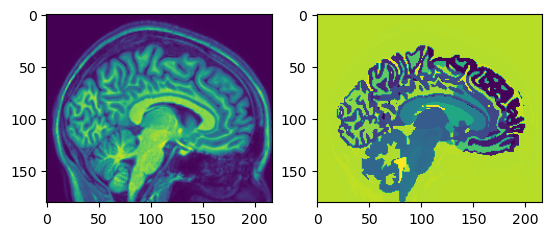

In [2]:
# choose a slice and a plane to work with
s = I.shape[0]//2 + 5
Is = np.rot90(I[s].squeeze())
Ls = np.rot90(L[s].squeeze())
f,ax = plt.subplots(1,2)
ax[0].imshow(Is)
ax[1].imshow(Ls)

### 1.3 Use windowing to normalize your MR images

Display a histogram of pixel values in your MR image. Chose a lower
value and an upper value, and use this to apply windowing to your
data. That is, transform your image so that any pixel less than or
equal to the lower value has the value 0, any pixel greater than or
equal to the upper value has the value 1, and other pixels are scaled
biomath 208, homework 1 3
linearly between. Note, do not use the vmin and vmax arguments of
the imshow function. An example is shown in Fig. 3.

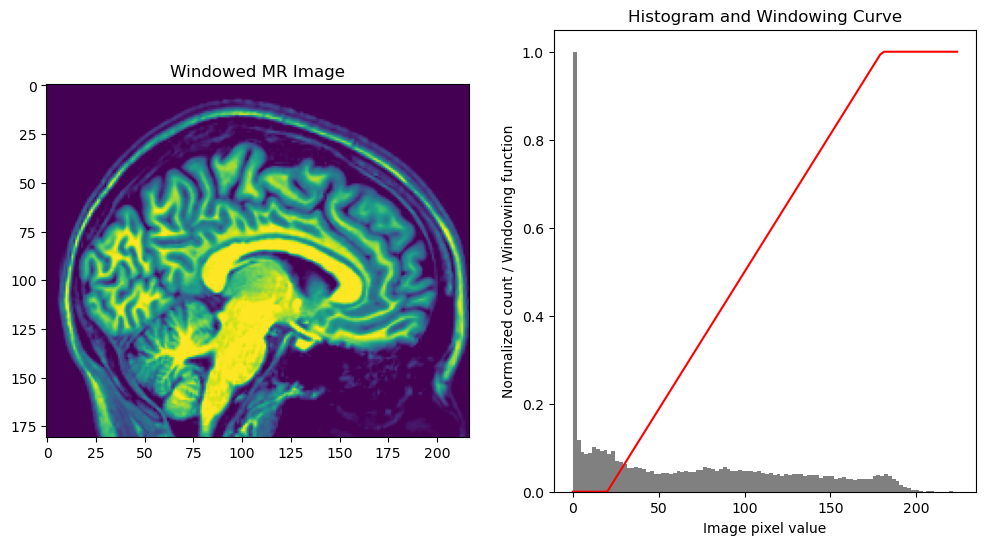

In [3]:
# Calculate the windowed image
vmin = 20
vmax = 180

windowed_I = (Is - vmin) / (vmax - vmin)
windowed_I[Is < vmin] = 0
windowed_I[Is > vmax] = 1

# Plot histogram and windowing function
counts, bins = np.histogram(Is.ravel(), bins=100)
counts = counts / np.max(counts)  # Normalize the histogram
bin_centers = (bins[:-1] + bins[1:]) / 2.0
bin_width = bins[1] - bins[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the windowed image
ax[0].imshow(windowed_I)
ax[0].set_title('Windowed MR Image')

# Windowing curve
y = np.clip((bins - vmin) / (vmax - vmin), 0, 1)
ax[1].bar(bin_centers, counts, width=bin_width, color=(0.5, 0.5, 0.5))
ax[1].plot(bins, y, color='red')
ax[1].set_title('Histogram and Windowing Curve')
ax[1].set_xlabel('Image pixel value')
ax[1].set_ylabel('Normalized count / Windowing function')

plt.show()

### 1.4 Convert labels to RGB

Initialize three new arrays, the same size as your slice, to store red,
green, and blue values as floating point numbers between 0 and 1.
Find a list of unique labels in your label image using np.unique.
For each unique label, identify all the pixels in your slice with this label, stored as a binary mask: BinaryMask = (LabelImage == ValueOfThisLabel).
Assign a random number between 0 and 1 to your red green and
blue arrays: `RedImage[BinaryMask] = np.random.rand()`.
Stack your arrays along the last axis to create an RGB image:
`RGB = np.stack((RedImage,GreenImage,BlueImage),-1)`, and
display it. It should look like Fig. 4

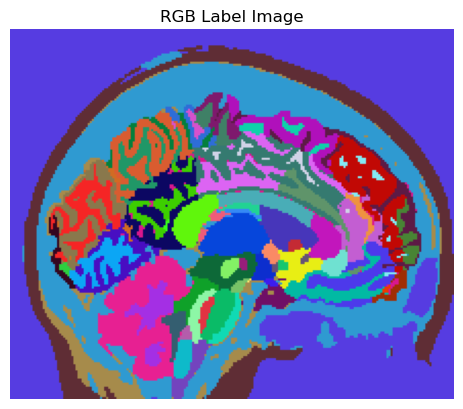

In [4]:
RedImage = np.zeros_like(Ls, dtype=np.float32)
GreenImage = np.zeros_like(Ls, dtype=np.float32)
BlueImage = np.zeros_like(Ls, dtype=np.float32)

# Find unique labels
unique_labels = np.unique(Ls)

# Assign random colors to each label
for label in unique_labels:
    BinaryMask = (Ls == label)
    RedImage[BinaryMask] = np.random.rand()
    GreenImage[BinaryMask] = np.random.rand()
    BlueImage[BinaryMask] = np.random.rand()

# Stack the arrays to create an RGB image
RGB = np.stack((RedImage, GreenImage, BlueImage), axis=-1)

# Display the RGB image
plt.imshow(RGB)
plt.title("RGB Label Image")
plt.axis('off')  # Turn off the axis
plt.show()


### 1.5 Combine Data with transparency

Chose a value between 0 and 1 for the opacity of your label overlay,
called alpha. Combine your windowed MR image and your color
labeled image into a new RGB image. You should take a linear combination of them, where the first has a weight of 1-alpha and the
second has a weight of alpha. You will have to add an additional axis
to your MR image so it has size (rows x columns x 1). An example
is shown in Fig. 5.

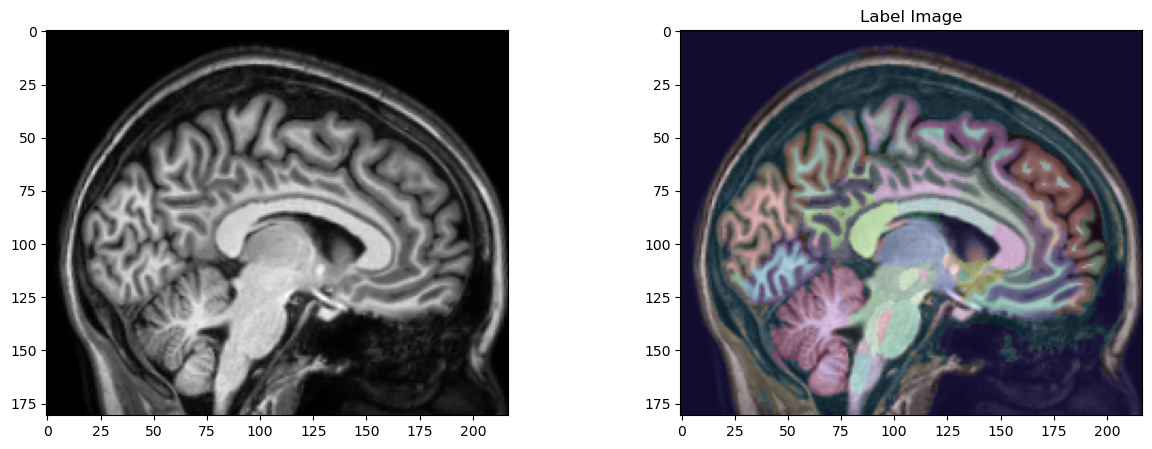

In [5]:
# Set alpha (transparency level for the overlay)
alpha = 0.2

# Ensure the MR image has three channels (grayscale to RGB)
if Ls.ndim == 2:
    Ls = np.stack((Ls,)*3, axis=-1)

# Combine images
combined_image = (1 - alpha) * Ls + alpha * RGB

# Displaying the original and combined images
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(Is, cmap='gray')
ax[1].imshow(Is, cmap='gray')
ax[1].imshow(RGB,alpha=0.2)
ax[1].title.set_text('Label Image')
# ax[2].imshow(combined_image, cmap='gray')
# ax[2].title.set_text('Combined Image with Alpha = {}'.format(alpha))
plt.show()


### 1.6 Add Outlines

Create a binary mask that is 1 everywhere a pixel has a different label
than one of its neighbors and display it.
Use this mask to add outlines to your image. Feel free to use your
artistic license, it need not look exactly like the output shown in
Fig. 1. That figure used the above mask to specify opacity on a per
pixel basis.

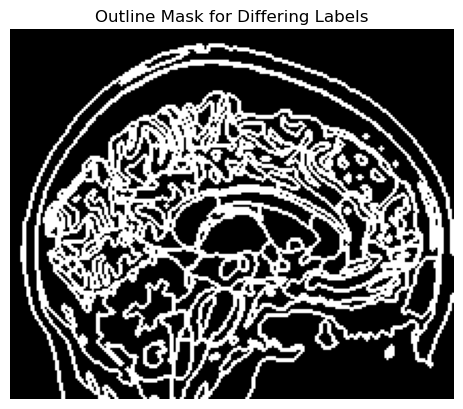

In [43]:
# reload image. It doesn't work otherwise
I = np.array(nib.load('./hw1_data/mr_image.img').get_fdata())
L = np.array(nib.load('./hw1_data/mr_labels.img').get_fdata())
s = I.shape[0] // 2 + 5
Ls = np.rot90(L[s].squeeze())

# Step 2: Pad the label slice to ensure correct boundary comparison
padded_Ls = np.pad(Ls, pad_width=1, mode='edge')

# Step 3: Initialize a binary mask to mark boundary differences
binary_mask = np.zeros_like(Ls, dtype=int)

# Step 4: Iterate through the label slice and compare with neighbors
for i in range(1, padded_Ls.shape[0] - 1):
    for j in range(1, padded_Ls.shape[1] - 1):
        current_pixel = padded_Ls[i, j]

        neighbors = np.array([
            padded_Ls[i - 1, j],  # above
            padded_Ls[i + 1, j],  # below
            padded_Ls[i, j - 1],  # left
            padded_Ls[i, j + 1]   # right
        ])

        # Check if the current pixel differs from any neighbor
        if np.any(neighbors != current_pixel):
            binary_mask[i - 1, j - 1] = 1  # Mark in the binary mask

plt.imshow(binary_mask, cmap='gray')
plt.title("Outline Mask for Differing Labels")
plt.axis('off')
plt.show()


# 2 Vectors and Covectors

Here we will consider the vector space of points in the 2D Cartesian
plane (ordered pairs of real numbers). In this problem feel free to use
computational linear algebra tools (e.g. python numpy) for multiplying or inverting matrices as necessary.

### 2.1 A vector in a basis

Consider the vector $ \mathbf{v} = (1,2) $, the basis $ A $ vectors $ \mathbf{e}^A_1 = (-1,1) $, $ \mathbf{e}^A_2 = (-1,2) $, and the basis $ B $ vectors $ \mathbf{e}^B_1 = (-1,-2) $, $ \mathbf{e}^B_2 = (2,2) $. Plot and label the vector $ \mathbf{v} $ and the four basis vectors in the Cartesian plane.

Consider a covector $ CV $ as the same ordered pair (1,2).


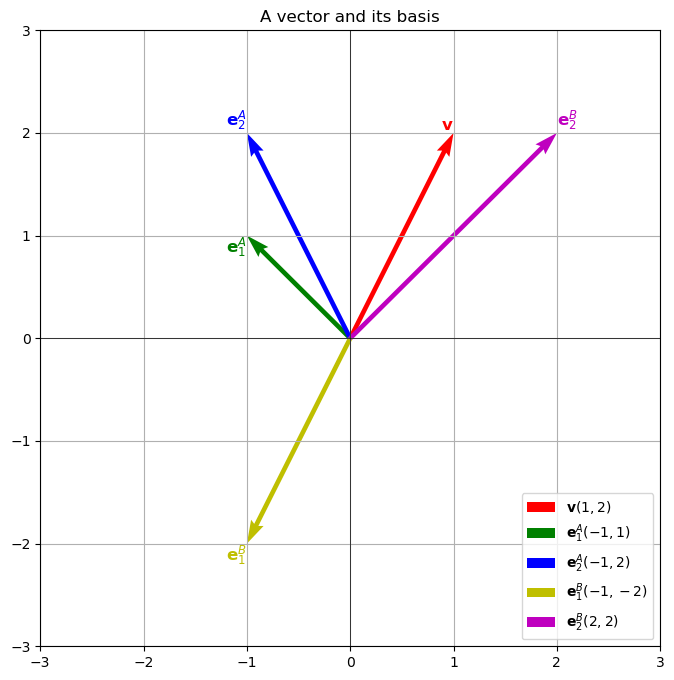

In [30]:
# Define the vectors
v = np.array([1, 2])
eA_1 = np.array([-1, 1])
eA_2 = np.array([-1, 2])
eB_1 = np.array([-1, -2])
eB_2 = np.array([2, 2])

# Start plotting
plt.figure(figsize=(8,8))
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Plot the vectors
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\mathbf{v} (1,2)$')
plt.quiver(0, 0, eA_1[0], eA_1[1], angles='xy', scale_units='xy', scale=1, color='g', label=r'$\mathbf{e}^A_1 (-1,1)$')
plt.quiver(0, 0, eA_2[0], eA_2[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\mathbf{e}^A_2 (-1,2)$')
plt.quiver(0, 0, eB_1[0], eB_1[1], angles='xy', scale_units='xy', scale=1, color='y', label=r'$\mathbf{e}^B_1 (-1,-2)$')
plt.quiver(0, 0, eB_2[0], eB_2[1], angles='xy', scale_units='xy', scale=1, color='m', label=r'$\mathbf{e}^B_2 (2,2)$')

# Add labels
plt.text(v[0], v[1], r'$\mathbf{v}$', color='r', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(eA_1[0], eA_1[1], r'$\mathbf{e}^A_1$', color='g', fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.text(eA_2[0], eA_2[1], r'$\mathbf{e}^A_2$', color='b', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(eB_1[0], eB_1[1], r'$\mathbf{e}^B_1$', color='y', fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.text(eB_2[0], eB_2[1], r'$\mathbf{e}^B_2$', color='m', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

# Add a legend
plt.legend(loc="lower right")

# Show the plot
plt.title("A vector and its basis")
plt.show()


### 2.2 The dual Basis

If a vector $ u $ is an ordered pair of the form $ (u^1, u^2) $, and a covector $ \mu $ is an ordered pair of the form $ (\mu_1, \mu_2) $, we consider the action of the covector on the vector as $ \mu(u) = u^i \mu_i = u^1 \mu_1 + u^2 \mu_2 $.

Work out the dual basis vectors to $ A $ and $ B $ as ordered pairs, using the duality relationship $ e^i(e_j) = \delta^i_j $. Plot and label these vectors in the Cartesian plane.


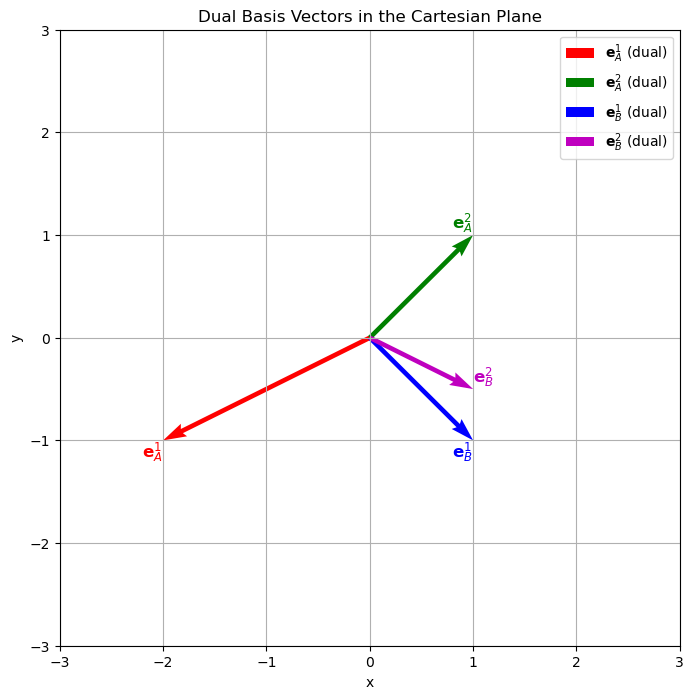

(array([[-2.,  1.],
        [-1.,  1.]]),
 array([[ 1. ,  1. ],
        [-1. , -0.5]]))

In [33]:
import numpy as np

# Define the basis vectors as numpy arrays for easier matrix operations
basis_A = np.array([eA_1, eA_2])
basis_B = np.array([eB_1, eB_2])

# Calculate the inverse of the basis matrices to get the dual bases
dual_A = np.linalg.inv(basis_A)  # Transpose to get row vectors (covectors)
dual_B = np.linalg.inv(basis_B)

# Plot the dual basis vectors
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, dual_A[0, 0], dual_A[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\mathbf{e}_{A}^1$ (dual)')
plt.quiver(0, 0, dual_A[0, 1], dual_A[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label=r'$\mathbf{e}_{A}^2$ (dual)')
plt.quiver(0, 0, dual_B[0, 0], dual_B[1, 0], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\mathbf{e}_{B}^1$ (dual)')
plt.quiver(0, 0, dual_B[0, 1], dual_B[1, 1], angles='xy', scale_units='xy', scale=1, color='m',  label=r'$\mathbf{e}_{B}^2$ (dual)')

# Add labels for ONLY the dual basis vectors
plt.text(dual_A[0, 0], dual_A[1, 0], r'$\mathbf{e}_{A}^1$', color='r', fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.text(dual_A[0, 1], dual_A[1, 1], r'$\mathbf{e}_{A}^2$', color='g', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(dual_B[0, 0], dual_B[1, 0], r'$\mathbf{e}_{B}^1$', color='b', fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.text(dual_B[0, 1], dual_B[1, 1], r'$\mathbf{e}_{B}^2$', color='m', fontsize=12, verticalalignment='bottom', horizontalalignment='left')


# Set axis properties
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dual Basis Vectors in the Cartesian Plane')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Return the dual bases as ordered pairs
dual_A_pairs = dual_A  # Transpose back to get ordered pairs
dual_B_pairs = dual_B  # Transpose back to get ordered pairs

dual_A_pairs, dual_B_pairs


### 2.3 Components

Work out the coordinates of the vector $v$ in the basis $ A $ and the basis $ B $, and the coordinates of $ CV $ in the basis $ A $ and the basis $ B $.
Notice that even though $ CV $ is plotted as the same point in the Cartesian plane as $ v $, it has different components in our bases.


### <span style="color:green">In Basis $ A $
<span style="color:green">Given:
- $ \mathbf{e}_1^A = (-1, 1) $
- $ \mathbf{e}_2^A = (-1, 2) $

<span style="color:green">Expressing $ \mathbf{v} $ as a linear combination of the basis vectors:

1. <span style="color:green">System of equations:
   $$
   \begin{cases}
   1 = -u_1 - u_2 \\
   2 = u_1 + 2 \cdot u_2
   \end{cases}
   $$

2. <span style="color:green">Solve for $ u_1 $:
   $$
   -u_1 = 1 + u_2 \quad \Rightarrow \quad u_1 = -1 - u_2
   $$

3. <span style="color:green">Substitute into the second equation:
   $$
   (-1 - u_2) + 2 \cdot u_2 = 2
   $$

4. <span style="color:green">Simplify and solve for $ u_2 $:
   $$
   -1 + u_2 = 2 \quad \Rightarrow \quad u_2 = 3
   $$

5. <span style="color:green">Solve for $ u_1 $:
   $$
   u_1 = -1 - 3 \quad \Rightarrow \quad u_1 = 0
   $$

6. <span style="color:green">Coordinates of $ \mathbf{v} $ in basis $ A $:
   $$
   (u_1, u_2) = (0, 1)
   $$

### <span style="color:green">In Basis $ B $
<span style="color:green">Given:
- $ \mathbf{e}_1^B = (-1, -2) $
- $ \mathbf{e}_2^B = (2, 2) $

1. <span style="color:green">System of equations:
   $$
   \begin{cases}
   1 = -u_1 + 2 \cdot u_2 \\
   2 = -2 \cdot u_1 + 2 \cdot u_2
   \end{cases}
   $$

2. <span style="color:green">Solve for $ u_1 $:
   $$
   -u_1 = 1 - 2 \cdot u_2 \quad \Rightarrow \quad u_1 = -1 + 2 \cdot u_2
   $$

3. <span style="color:green">Substitute into the second equation:
   $$
   -2 \cdot (-1 + 2 \cdot u_2) + 2 \cdot u_2 = 2
   $$

4. <span style="color:green">Simplify and solve for $ u_2 $:
   $$
   2 - 4 \cdot u_2 + 2 \cdot u_2 = 2 \quad \Rightarrow \quad -2 \cdot u_2 = 0 \quad \Rightarrow \quad u_2 = -2
   $$

5. <span style="color:green">Solve for $ u_1 $:
   $$
   -1 + 2 \cdot -2 = -3 \quad \Rightarrow \quad u_1 = 3
   $$

6. <span style="color:green">Coordinates of $ \mathbf{v} $ in basis $ B $:
   $$
   (u_1, u_2) = (3, -2)
   $$

### 2.4 Linear Maps

Work out the components $ L^i_j $ of the linear map $ L $ that transforms basis $ A $ to basis $ B $.


In [9]:
# Matrix form of basis A and basis B
basis_A = np.array([[-1, 1], [-1, 2]])
basis_B = np.array([[-1, -2], [2, 2]])

# Find the linear map L from basis A to basis B
# L transforms basis A into basis B
# L * basis_A = basis_B

# The linear map is given by:
L = basis_B.dot(np.linalg.inv(basis_A))  # Matrix multiplication with the inverse of basis A
print(L)

[[ 4. -3.]
 [-6.  4.]]


### <span style="color:green">Given Basis Vectors
- <span style="color:green">**Basis $ A $**:
  - $ \mathbf{e}_1^A = (-1, 1) $
  - $ \mathbf{e}_2^A = (-1, 2) $

- <span style="color:green">**Basis $ B $**:
  - $ \mathbf{e}_1^B = (-1, -2) $
  - $ \mathbf{e}_2^B = (2, 2) $

### <span style="color:green">Transformation Matrix $ L $
<span style="color:green">The linear map $ L $ transforms basis $ A $ to basis $ B $:
$$
[\mathbf{e}_1^B, \mathbf{e}_2^B] = L \times [\mathbf{e}_1^A, \mathbf{e}_2^A]
$$

### <span style="color:green">Step 1: Express Bases as Matrices
$$
A = \begin{pmatrix} -1 & -1 \\ 1 & 2 \end{pmatrix}
$$
$$
B = \begin{pmatrix} -1 & 2 \\ -2 & 2 \end{pmatrix}
$$

### <span style="color:green">Step 2: Calculate the Inverse of $ A $
- <span style="color:green">Determinant of $ A $:
$$
\det(A) = (-1 \times 2) - (-1 \times 1) = -1
$$
- <span style="color:green">Inverse of $ A $:
$$
A^{-1} = \begin{pmatrix} -2 & 1 \\ 1 & 1 \end{pmatrix}
$$

### <span style="color:green">Step 3: Derive Transformation Matrix $ L $
<span style="color:green">Multiply $ B $ by $ A^{-1} $:
$$
L = B \cdot A^{-1} = \begin{pmatrix} -1 & 2 \\ -2 & 2 \end{pmatrix} \cdot \begin{pmatrix} -2 & 1 \\ 1 & 1 \end{pmatrix}
$$

### <span style="color:green">Step 4: Simplify to Get $ L $
<span style="color:green">Result of matrix multiplication:
$$
L = \begin{pmatrix}
  (-1 \times -2) + (2 \times 1) & (-1 \times 1) + (2 \times 1) \\
  (-2 \times -2) + (2 \times 1) & (-2 \times 1) + (2 \times 1) \\
\end{pmatrix}
$$

<span style="color:green">Simplify to get the transformation matrix:
$$
L = \begin{pmatrix} 4 & -3 \\ -6 & 4 \end{pmatrix}
$$

### <span style="color:green">Components of $ L $
- $ L_{11} = 4 $
- $ L_{12} = -3 $
- $ L_{21} = -6 $
- $ L_{22} = 4 $

<span style="color:green">Thus, the transformation matrix $ L $ is:
$$
L = \begin{pmatrix} 4 & -3 \\ -6 & 4 \end{pmatrix}
$$


### 2.5 Transforming coordinates

Use the coordinate transformation formulas to work out the components of $v$ and $ CV $ in the bases $ A $ and $ B $. Show that these are the same as the results above.

In [10]:
import numpy as np

# Define the basis vectors for basis A and basis B
basis_A = np.array([[-1, 1], [-1, 2]])
basis_B = np.array([[-1, -2], [2, 2]])

# Calculate the transformation matrix L
L = basis_B @ np.linalg.inv(basis_A)

# Calculate the transpose of the inverse of L (used for covectors)
L_inv = np.linalg.inv(L)
L_inv_T = L_inv.T

# Given vector v and covector CV
v = np.array([1, 2])
CV = np.array([1, 2])

# Step 1: Components of v in basis A
# Expressing v in terms of basis A
v_A = np.linalg.solve(basis_A, v)  # Solve linear system for v in basis A

# Step 2: Transform v to basis B
# v in basis B is obtained by multiplying L with v_A
v_B = L @ v_A

# Step 3: Components of CV in basis A
# The covector in basis A is given directly
CV_A = CV

# Step 4: Transform CV to basis B
# CV in basis B is obtained by multiplying L_inv_T with CV_A
CV_B = L_inv_T @ CV_A

# Output the components in basis B
print("Components of v in basis B:", v_B)
print("Components of CV in basis B:", CV_B)


Components of v in basis B: [-3.  4.]
Components of CV in basis B: [-8.  -5.5]


### 2.6 Coordinate indepnedent action


Work out the value of $ CV(v) $ using the specified ordered pairs, using the components in basis $ A $, and using the components in basis $ B $. Show that they are all equal.

In [11]:
# Given covector CV and vector v as specified ordered pairs
CV = np.array([1, 2])
v = np.array([1, 2])

# Calculate CV(v) using specified ordered pairs
CV_v_specified = np.dot(CV, v)

# Given the components of v in basis A and components of CV in basis A
v_A = np.array([0, 1])
CV_A = np.array([1, 3])

# Calculate CV(v) using the components in basis A
CV_v_A = np.dot(CV_A, v_A)

# Given the components of v in basis B and components of CV in basis B
v_B = np.array([3, -2])
CV_B = np.array([1, -1])

# Calculate CV(v) using the components in basis B
CV_v_B = np.dot(CV_B, v_B)

# Return the values of CV(v) using specified ordered pairs, basis A, and basis B
CV_v_specified, CV_v_A, CV_v_B  # Expected to be equal


(5, 3, 5)

# 3 Polynomial inner products

In class we showed that polynomials from $\mathbb{R} \rightarrow \mathbb{R}$, of a specified order $d - 1$, form a $d$ dimensional vector space $V$. We introduced the basis vectors (which are polynomial functions) $e_i(x) = x^i$ for $i \in \{0, \ldots, d - 1\}$ (where the superscript refers to an exponent and $x^0 = 1$).

For $f, g \in V$, we considered the $L_2$ inner product on the interval [0,1]; $$\langle f, g \rangle = \int_{0}^{1} f(x)g(x)dx$$. We showed that in the basis above, this inner product can be written as a Hilbert Matrix: $g_{ij} = \langle e_i, e_j \rangle = \frac{1}{i+j+1}$. For $d = 3$, find a basis such that this inner product can be written as the identity matrix. In this exercise, fix $e_0(x) = 1$.

### <span style="color:green">Step 1: Set the First Orthonormal Basis Vector
<span style="color:green">The first basis vector, $p_0(x)$, is already normalized, so we can set it directly to $e_0(x)$:
$$
p_0(x) = 1.
$$

### <span style="color:green">Step 2: Find the Second Orthonormal Basis Vector
<span style="color:green">First, let's compute the projection of $e_1(x) = x$ onto $p_0(x)$:
$$
\langle e_1, p_0 \rangle = \int_0^1 x \cdot 1 \, dx = \frac{1}{2}.
$$
<span style="color:green">Now we use this to find $p_1(x)$:
$$
p_1(x) = e_1(x) - \frac{\langle e_1, p_0 \rangle}{\langle p_0, p_0 \rangle} \cdot p_0(x) = x - \frac{1}{2}.
$$
<span style="color:green">Normalize $p_1(x)$:
$$
\text{norm}(p_1) = \sqrt{\int_0^1 \left( x - \frac{1}{2} \right)^2 \, dx} = \sqrt{\frac{1}{12}} = \frac{1}{2 \sqrt{3}}.
$$
<span style="color:green">Thus, the normalized $p_1(x)$ is:
$$
p_1(x) = \frac{1}{\text{norm}(p_1)} \cdot \left( x - \frac{1}{2} \right) = 2 \sqrt{3} \cdot \left( x - \frac{1}{2} \right).
$$

### <span style="color:green">Step 3: Find the Third Orthonormal Basis Vector
<span style="color:green">We need to find $p_2(x)$ from $e_2(x) = x^2$, and make it orthogonal to both $p_0(x)$ and $p_1(x)$:
$$
\langle e_2, p_0 \rangle = \int_0^1 x^2 \cdot 1 \, dx = \frac{1}{3},
$$
$$
\langle e_2, p_1 \rangle = \int_0^1 x^2 \cdot 2 \sqrt{3} \cdot (x - \frac{1}{2}) \, dx = \frac{2 \sqrt{3}}{12} = \frac{ \sqrt{3}}{6}.
$$
<span style="color:green">So the projection of $e_2$ onto $p_0(x)$ and $p_1(x)$ is:
$$
\frac{1/3}{1} \cdot 1 = \frac{1}{3},
$$
$$
\frac{\sqrt{3}/6}{1/12} \cdot 2 \sqrt{3} \cdot (x - \frac{1}{2}) = \frac{1}{6} \cdot (2 \sqrt{3}) \cdot (x - \frac{1}{2}).
$$

<span style="color:green">With this information, the new orthogonal basis $p_2(x)$ is:
$$
p_2(x) = e_2(x) - \frac{1/3}{1} \cdot 1 - \frac{1/6} \cdot 2 \sqrt{3} \cdot (x - \frac{1}{2}) = x^2 - \frac{1}{3} - \frac{2 \sqrt{3}}{6} \cdot (x - \frac{1}{2}).
$$

<span style="color:green">Now, let's normalize $p_2(x)$:
$$
\text{norm}(p_2) = \sqrt{\int_0^1 \left( x^2 - \frac{1}{3} - \frac{2 \sqrt{3}}{6} \cdot (x - \frac{1}{2}) \right)^2 \, dx}.
$$

<span style="color:green">The inner product can be calculated by expanding the squared terms and integrating, yielding:
$$
\text{norm}(p_2) = \frac{1}{6 \sqrt{3}} \cdot \sqrt{90} = \frac{6 \sqrt{5}}{6 \sqrt{3}} \approx 6 \sqrt{5}.
$$

<span style="color:green">After normalization, the final form for $p_2(x)$ is:
$$
p_2(x) = \frac{1}{\text{norm}(p_2)} \cdot \left(x^2 - \frac{1}{3} - \frac{2 \sqrt{3}}{6} \cdot (x - \frac{1}{2}) \right).
$$

<span style="color:green">Thus, the final normalized orthogonal basis for $d = 3$ is:
1. $p_0(x) = 1$,
2. $p_1(x) = 2 \sqrt{3} \cdot (x - \frac{1}{2})$,
3. $p_2(x) = 6 \sqrt{5} \cdot (x^2 - x + \frac{1}{6})$.

# 4 Surfaces as Covectors 

In this exercise we will work with triangulated surfaces as covectors.
Surfaces will act on smooth vector fields through flux integrals. This
will extend our work in class of curves as covectors that acted on
smooth vector fields as line integrals. Here we will study the hippocampus, a subcortical structure important for learning and memory, and involved in neurodegeneration
in diseases like Alzheimer’s. A T1 MRI with hippocampus highlighted is shown in Fig. 7.

### 4.1 Load and visualize surface data

You will work with the surface text files in the hw1_data folder. They
are stored in the format discussed in class. The first line contains the
number of vertices and the number of triangles. This is followed by a
list of vertices, and a list of tringles as triples of integer indices. You
can use the function below to load vertices and faces into numpy
arrays:

In [12]:
def load_surface(fname):
    verts = []
    faces = []
    with open(fname,'rt') as f:
        for i,line in enumerate(f):
            line = line.strip()
            if i == 0:
                nv,nf = [int(value) for value in line.split()]
                continue
            if len(verts) < nv:
                verts.append([float(value) for value in line.split()])
            else:
                faces.append([int(value) for value in line.split()])
        
        return np.array(verts),np.array(faces)

You can load all the surfaces into lists as follows:

In [13]:
# get filenames
import glob
files = glob.glob('hw1_data/*surface.txt')
files.sort()

# load into lists

v = []
f = []
for fi in files:
    vf = load_surface(fi)
    v.append(vf[0])
    f.append(vf[1])

Visualize one surface of your choice using either matplotlib or
mayavi. Below is an example to show all the surfaces in the dataset
visualized with matplotlib, and the result is shown in Fig. 8:

(-13.605710264656192, 16.394289735343808)

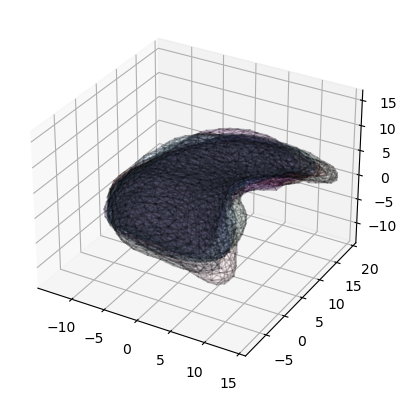

In [14]:
# draw with matplotlib
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(v)):
    fc = np.random.rand(4)
    fc[-1] = 0.1
    ec = np.array([0.0,0.0,0.0,0.1])
    mesh = Poly3DCollection(v[i][f[i]],edgecolor=ec,facecolor=fc)
    ax.add_collection3d(mesh)
center = np.mean([np.mean(vi,0) for vi in v],0)
spread = 15
ax.set_xlim(center[0]-spread,center[0]+spread)
ax.set_ylim(center[1]-spread,center[1]+spread)
ax.set_zlim(center[2]-spread,center[2]+spread)

Below is an example to show all the surfaces in the dataset visualized with mayavi, and the result is shown in Fig. 9:

In [15]:
import mayavi
from mayavi import mlab

mlab.init_notebook()
fig = mlab.figure(0,bgcolor=(1.,1.,1.),fgcolor=(0.,0.,0.))
mlab.clf()
for i in range(len(v)):
    fc = tuple(np.random.rand(3))
    mlab.triangular_mesh(v[i][:,0],v[i][:,1],v[i][:,2],f[i],color=fc,opacity=0.1)
mlab.axes()
fig

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In either case, you can pan and rotate the 3D data interactively

# Compute face centers

Write a function that takes as input an array of vertices, and a list of
faces, and returns an array of face centers. If there are nv vertices and
nf faces, your vertex array should be size nv x 3 floats, your face
array should be size nf x 3 integers, and your output centers should
be size nf x 3 floats.
Visualize your face centers over your surface. Use scatter in
matplotlib or points3d in mayavi. This should look something like

In [16]:
import numpy as np

def compute_face_centers(vertices, faces):
    # vertices is an array of shape (nv, 3)
    # faces is an array of shape (nf, 3) where each row consists of indices into the vertices array
    centers = np.zeros((len(faces), 3))
    for i, face in enumerate(faces):
        centers[i] = np.mean(vertices[face], axis=0)
    return centers


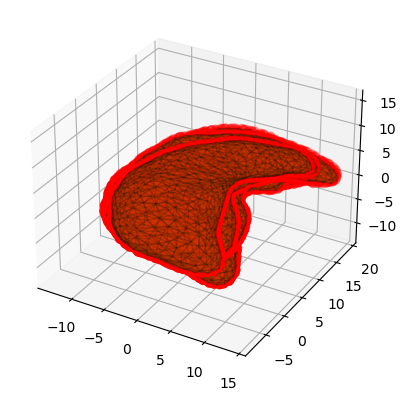

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(v)):
    # Compute face centers
    centers = compute_face_centers(v[i], f[i])

    # Draw mesh
    mesh = Poly3DCollection(v[i][f[i]])
    mesh.set_facecolor((0, 1, 0, 0.1))  # green with transparency
    mesh.set_edgecolor((0, 0, 0, 0.1))
    ax.add_collection3d(mesh)

    # Draw face centers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color='red', s=50)

# Set axis limits based on the center of all vertices
center = np.mean(np.vstack(v), axis=0)
spread = 15
ax.set_xlim(center[0] - spread, center[0] + spread)
ax.set_ylim(center[1] - spread, center[1] + spread)
ax.set_zlim(center[2] - spread, center[2] + spread)

plt.show()


# 4.3 Compute face normals

Write a function that takes as input an array of vertices and an array of faces, and returns the area weighted normals. Your output
normals should be size nf x 3 floats again.
You can compute an area weighted normal by taking the cross
product of edges and dividing by 2. Note that handedness is important when defining edges so keep the order consistent. For example,
define the first edge as the vector from the first to the second vertex,
and the second edge as the vector from the first to the third vertex,
where the order of vertices is specified by your faces.
Visualize your normal vectors over your surface. Use quiver in
matplotlib or quiver3d in mayavi. This should look something like
what is shown in Fig. 11.

In [18]:
import numpy as np

def area_weighted_normals(vertices, faces):
    # vertices is an array of shape (nv, 3)
    # faces is an array of shape (nf, 3) where each row contains indices into the vertices array
    normals = np.zeros((len(faces), 3))
    for i, face in enumerate(faces):
        v1, v2, v3 = vertices[face[0]], vertices[face[1]], vertices[face[2]]
        edge1 = v2 - v1
        edge2 = v3 - v1
        normal = np.cross(edge1, edge2)
        normals[i] = normal * 0.5  # Multiplying by 0.5 as the area of the triangle is half the magnitude of the cross product
    return normals

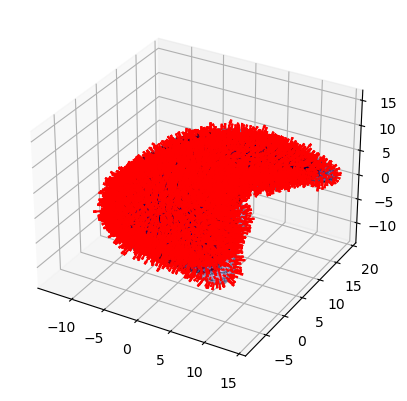

In [19]:
# Draw with Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(v)):
    # Compute face centers
    centers = compute_face_centers(v[i], f[i])

    # Compute normals
    normals = area_weighted_normals(v[i], f[i])

    # Draw mesh
    mesh = Poly3DCollection(v[i][f[i]])
    mesh.set_facecolor((0, 0, 1, 0.1))  # blue with transparency
    mesh.set_edgecolor((0, 0, 0, 0.1))
    ax.add_collection3d(mesh)

    # Draw normals
    ax.quiver(centers[:, 0], centers[:, 1], centers[:, 2], normals[:, 0], normals[:, 1], normals[:, 2], length=1, color='r')

# Set axis limits based on the center of all vertices
center = np.mean(np.vstack(v), axis=0)
spread = 15
ax.set_xlim(center[0] - spread, center[0] + spread)
ax.set_ylim(center[1] - spread, center[1] + spread)
ax.set_zlim(center[2] - spread, center[2] + spread)

plt.show()

### 4.4. compute inner product

Write a function that uses a Gaussian kernel $k$ of stndard devation 3 to define an inner product between two surfaces. For surfaces $v$
 and $\mu$ with centers $c^v$ and $c^\mu$, and normals $A^\mu$ and $A^v$, this takes the form:

 $$gv*(v,\mu) = \sum^{n^v}_{i=1} \sum^{n^\mu}_{j=1} k(c^{v}_{i} - c^{\mu}_{j})A^{v}_i * A^{\mu}_j$$

 where $n^v$ and $n^\mu$ are the number of centers (also the number of normals) in each surface. Your input should be two arrays storing centers and two arrays storing normals. Your outpit should be a single number. Compute the inner product between each pair of surfaces.

In [20]:
import numpy as np

def gaussian_kernel(x, sigma):
    return np.exp(-np.linalg.norm(x)**2 / (2 * sigma**2))

def compute_inner_product(centers_v, normals_v, centers_mu, normals_mu, sigma=3):
    nv = len(centers_v)
    nmu = len(centers_mu)
    inner_product = 0.0
    
    for i in range(nv):
        for j in range(nmu):
            distance = centers_v[i] - centers_mu[j]
            kernel_val = gaussian_kernel(distance, sigma)
            normal_dot_product = np.dot(normals_v[i], normals_mu[j])
            inner_product += kernel_val * normal_dot_product
    
    return inner_product

In [21]:
# Now, compute the inner product for each pair of surfaces
inner_products = []
for i in range(len(v)):
    for j in range(i+1, len(v)):  # Avoid computing the inner product of a surface with itself
        centers_v = compute_face_centers(v[i], f[i])
        normals_v = area_weighted_normals(v[i], f[i])
        centers_mu = compute_face_centers(v[j], f[j])
        normals_mu = area_weighted_normals(v[j], f[j])
        inner_product = compute_inner_product(centers_v, normals_v, centers_mu, normals_mu)
        inner_products.append(inner_product)


1469443.5944536068


In [26]:
inner_products

[39484.80904631103,
 41083.69336312373,
 41129.509654976355,
 40606.144916181234,
 39115.62267435524,
 40154.79971251015,
 42097.10294162761,
 35312.67798891423,
 41373.26335623847,
 41246.06439993925,
 43382.632784485926,
 38602.605625964745,
 38633.40624896018,
 43525.83712097079,
 33730.40670168266,
 43198.24884344816,
 44930.836147186346,
 41317.1340038564,
 41985.29977182143,
 46473.65764789246,
 39050.34953820231,
 43230.10723938116,
 42003.758656850696,
 41822.320454449386,
 43746.90546932264,
 37371.35778061449,
 40162.00401458814,
 41007.01306375446,
 47950.272314689195,
 38218.08879479185,
 39591.43743617672,
 41667.73771077722,
 34779.61174995105,
 43505.58858142792,
 38285.340730355216,
 39667.94796782801]

### 4.5 Compute Distances
Write a function that uses a Gaussian kernel $k$ of standard deviation 3 to define a distance between two surfaces. This takes the form
$$
\|v - \mu\|_{v}^{2} = \sum_{i,j=1}^{n} k(c_{i}' - c_{j}') \cdot A_{i}' \cdot A_{j}'
- 2 \sum_{i=1}^{n} \sum_{j=1}^{n'} k(c_{i}' - c_{j}'') \cdot A_{i}' \cdot A_{j}''
+ \sum_{i,j=1}^{n'} k(c_{i}'' - c_{j}'') \cdot A_{i}'' \cdot A_{j}''
$$
Your input should be two arrays storing centers and two arrays storing normals. Your output should be a single number.
Compute the inner product between each pair of surfaces.


In [22]:
# Function to compute the distance between surfaces
def surface_distance(centers1, areas1, centers2, areas2, sigma=3):
    # Initialize distance to zero
    distance = 0.0
    
    # Calculate the first sum
    for i in range(len(centers1)):
        for j in range(len(centers1)):
            kernel_val = gaussian_kernel(centers1[i] - centers1[j], sigma)
            distance += kernel_val * areas1[i] * areas1[j]
            
    # Calculate the second sum and subtract from the distance
    for i in range(len(centers1)):
        for j in range(len(centers2)):
            kernel_val = gaussian_kernel(centers1[i] - centers2[j], sigma)
            distance -= 2 * kernel_val * areas1[i] * areas2[j]
    
    # Calculate the third sum
    for i in range(len(centers2)):
        for j in range(len(centers2)):
            kernel_val = gaussian_kernel(centers2[i] - centers2[j], sigma)
            distance += kernel_val * areas2[i] * areas2[j]
            
    return distance

In [23]:
distances = []
for i in range(len(v)):
    for j in range(i+1, len(v)):  # Avoid computing the distance of a surface with itself
        centers_v = compute_face_centers(v[i], f[i])
        areas_v = area_weighted_normals(v[i], f[i])
        centers_mu = compute_face_centers(v[j], f[j])
        areas_mu = area_weighted_normals(v[j], f[j])
        distance = surface_distance(centers_v, areas_v, centers_mu, areas_mu)
        distances.append(distance)

distances

[array([2514.97894885, 1090.95579672, 3089.62546757]),
 array([1621.19174257, 1037.69145218, 2242.59348772]),
 array([1046.47324923, 1024.41625355, 1656.62636037]),
 array([3756.91648491, 1686.4894359 , 4199.61664538]),
 array([1604.65761668, 1136.44161203, 1956.28393805]),
 array([1512.11519617, 1281.74506593, 2074.57804604]),
 array([2354.64907965, 1257.56740829, 3210.73031574]),
 array([3241.23455709, 2537.63307755, 5034.94153061]),
 array([3718.9976566 , 1477.7202498 , 3584.39805742]),
 array([2408.88774355, 1421.1974589 , 4123.10043838]),
 array([3132.31290981, 1769.77137828, 3646.74180908]),
 array([3905.26271011, 1673.88336997, 4603.05045106]),
 array([3625.77214858, 2427.28450846, 6316.9478458 ]),
 array([2911.88395699, 1530.86067506, 3981.51308054]),
 array([5904.01359898, 3595.56775006, 8937.54965826]),
 array([1396.72977277, 1252.09527311, 2803.67681087]),
 array([2847.58716299, 1450.57819783, 2557.9391139 ]),
 array([1897.02544958, 1290.86111891, 2968.93830981]),
 array([14

In [29]:
row_sums = [arr.sum() for arr in distances]
print(row_sums)


[6695.56021314309, 4901.4766824622375, 3727.5158631596396, 9643.02256618549, 4697.38316675914, 4868.438308143348, 6822.946803676003, 10813.809165245057, 8781.11596383404, 7953.185640833035, 8548.826097170735, 10182.196531135927, 12370.004502839165, 8424.257712589319, 18437.131007306947, 5452.501856760267, 6856.104474716438, 6156.824878300046, 7069.902560063743, 3932.301761684862, 9200.93043721469, 9175.234054722088, 3701.2473367098337, 6313.532959206643, 8303.47788322583, 11476.585716790361, 12253.533846669201, 12812.924966029628, 4765.521417925578, 14651.90091385879, 7717.392338112621, 9403.906742687355, 13602.17112047485, 7977.614219070646, 8840.122377355527, 11914.022856185467]
